<a href="https://colab.research.google.com/github/tomas-pinheiro/tomas-pinheiro/blob/main/Projeto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Lendo a base de dados 
base_dados = pd.read_csv('StudentsPerformance.csv')

In [4]:
# Dimensão
base_dados.shape

(1000, 8)

In [5]:
# Head
base_dados.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


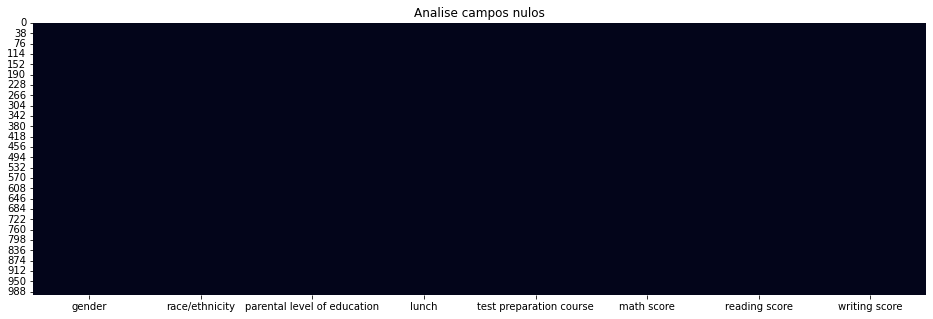

In [6]:
# Campos nulos
nulos = base_dados.isnull()

plt.figure(figsize=(16,5))
plt.title('Analise campos nulos')
sns.heatmap(nulos, cbar=False);

In [7]:
nulos.sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
# Únicos
base_dados.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [9]:
# Campos duplicados
base_dados.duplicated().sum()

0

In [10]:
# Estatística descritiva
base_dados.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
# Entendendo Dtype
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
# Porcentagem da relação M/F
base_dados['gender'].value_counts(normalize=True)*100

female    51.8
male      48.2
Name: gender, dtype: float64

In [13]:
base_dados['race/ethnicity'].value_counts(normalize=True)*100

group C    31.9
group D    26.2
group B    19.0
group E    14.0
group A     8.9
Name: race/ethnicity, dtype: float64

In [14]:
base_dados['parental level of education'].value_counts(normalize=True)*100

some college          22.6
associate's degree    22.2
high school           19.6
some high school      17.9
bachelor's degree     11.8
master's degree        5.9
Name: parental level of education, dtype: float64

In [15]:
base_dados['lunch'].value_counts(normalize=True)*100

standard        64.5
free/reduced    35.5
Name: lunch, dtype: float64

In [16]:
base_dados['test preparation course'].value_counts(normalize=True)*100

none         64.2
completed    35.8
Name: test preparation course, dtype: float64

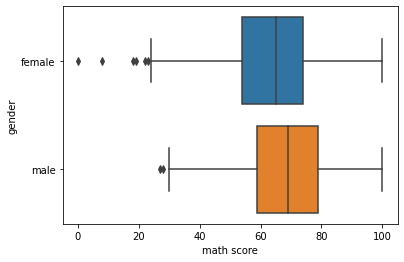

In [17]:
sns.boxplot( data=base_dados, x='math score', y='gender');

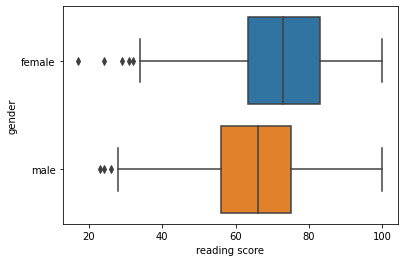

In [18]:
sns.boxplot( data=base_dados, x='reading score', y='gender');

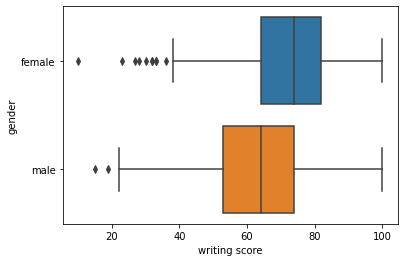

In [19]:
sns.boxplot( data=base_dados, x='writing score', y='gender');

In [20]:
base_dados.groupby(by=['gender']).describe()['math score'].reset_index()

,gender,count,mean,std,min,25%,50%,75%,max
0,female,518.0,63.633205,15.491453,0.0,54.0,65.0,74.0,100.0
1,male,482.0,68.728216,14.356277,27.0,59.0,69.0,79.0,100.0


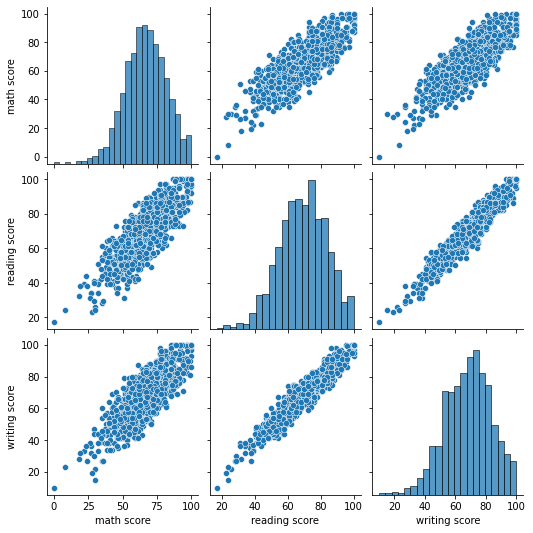

In [25]:
sns.pairplot(base_dados);

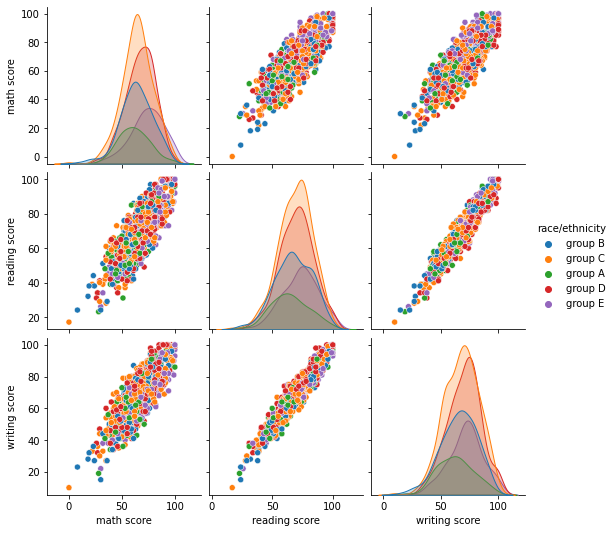

In [28]:
sns.pairplot(base_dados, hue = 'race/ethnicity');

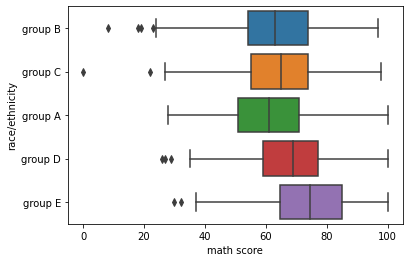

In [30]:
sns.boxplot(data=base_dados, x='math score', y = 'race/ethnicity');

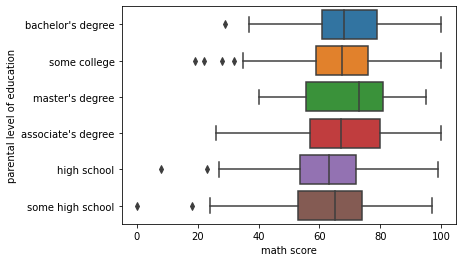

In [31]:
sns.boxplot(data=base_dados, x='math score', y = 'parental level of education');

In [33]:
base_dados.groupby( by=['parental level of education']).describe()['math score'].reset_index()

,parental level of education,count,mean,std,min,25%,50%,75%,max
0,associate's degree,222.0,67.882883,15.112093,26.0,57.00,67.0,80.0,100.0
1,bachelor's degree,118.0,69.389831,14.943789,29.0,61.00,68.0,79.0,100.0
2,high school,196.0,62.137755,14.539651,8.0,53.75,63.0,72.0,99.0
3,master's degree,59.0,69.745763,15.153915,40.0,55.50,73.0,81.0,95.0
4,some college,226.0,67.128319,14.312897,19.0,59.00,67.5,76.0,100.0
5,some high school,179.0,63.497207,15.927989,0.0,53.00,65.0,74.0,97.0


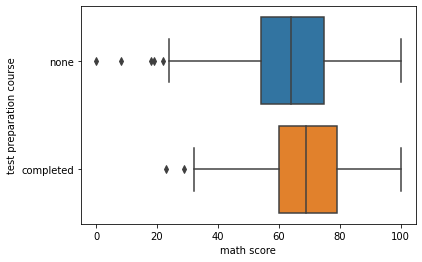

In [34]:
sns.boxplot(data=base_dados, x='math score', y = 'test preparation course');

In [35]:
base_dados.groupby( by=['test preparation course']).describe()['math score'].reset_index()

,test preparation course,count,mean,std,min,25%,50%,75%,max
0,completed,358.0,69.695531,14.444699,23.0,60.0,69.0,79.00,100.0
1,none,642.0,64.077882,15.192376,0.0,54.0,64.0,74.75,100.0


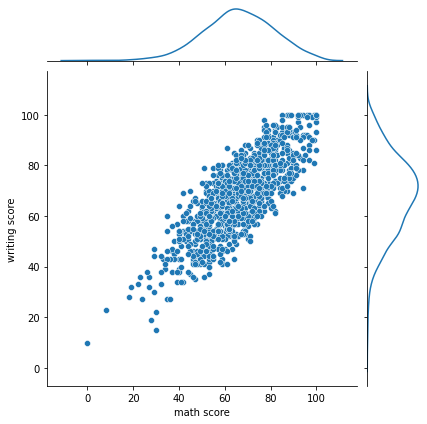

In [45]:
grafico = sns.JointGrid(data = base_dados, x = 'math score', y = 'writing score')
grafico.plot(sns.scatterplot, sns.kdeplot);